In [52]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [53]:
# source path 
source = r'E:/USGS/test/'

In [61]:
# define a function
def visualize_tiles(image, source_path, save):
    
    # open the image
    im = Image.open(source + image)

    # set up figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), constrained_layout=True)

    # display the image
    ax.imshow(im, cmap='Greys_r')
    
    # load the json
    with open(source + 'tile_classification_results.json', 'r') as data:
         json_data = json.loads(data.read())
    
    # mask out the extra data
    json_data = json_data[image[:-5]]
    
    # loop through each tile
    for tile in json_data:
            
        # get the tile coordinates as pixel values
        tile_x = tile['x']*200
        tile_y = tile['y']*200

        # get the line color
        if tile['class_label'] == 0:
            color = 'k'  
        elif tile['class_label'] == 1:
            color = 'orange'
        elif tile['class_label'] == 2:
            color = 'r'

        # create a rectangle patch corresponding to the tile
        rect = patches.Rectangle((tile_x, tile_y), 200, 200, linewidth=1, edgecolor=color, facecolor=color)
        rect.set_alpha(0.2)

        # add the patch to the Axes
        ax.add_patch(rect)
    
    # turn of axes
    plt.axis('off')
    
    # save visualization
    if save == True:
        plt.savefig(source + "vis_" + image[:-5] + ".png", dpi=300, facecolor='white')
    
    plt.show()

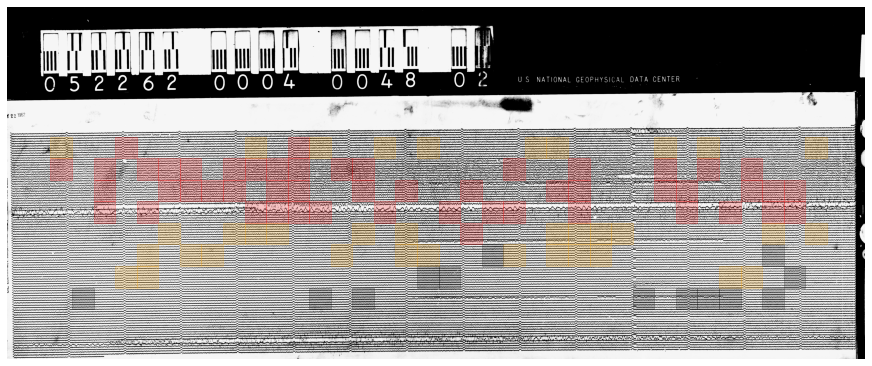

In [64]:
visualize_tiles("HNR_62_05_22_0004_SHN.TIFF", source, True);